<a href="https://colab.research.google.com/github/saishree-2003/projects/blob/main/Banking_behaviour_score_card(major_project)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import re
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0.0,1.0,0.0,1.0,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0.0,0.0,0.0,0.0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0.0,1.0,1.0,0.0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0.0,0.0,0.0,0.0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0.0,0.0,0.0,0.0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


0    126
1      8
Name: Col2, dtype: int64


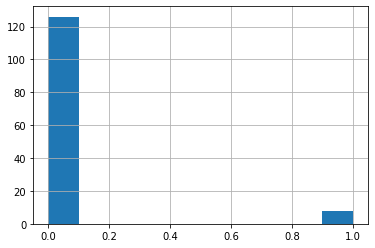

In [ ]:
target = train["Col2"]
print(target.value_counts())
target.hist()

In [ ]:
x_train = train.iloc[:, 2:]
y_train = train['Col2']
x_test = test.iloc[:, 1:]

In [ ]:
def check_columns(df, column):
    for j in column:
        df[j] = df[j].replace('-', '0')
        df[j] = pd.to_numeric(df[j])
    return df

In [ ]:
check_test_column = []
for column in x_test.columns:
    if (test[column].dtypes) != 'float64' and test[column].dtypes != 'int64':
        print(column, test[column].dtypes)
        check_test_column.append(column)

Col742 object
Col763 object
Col791 object
Col813 object
Col831 object
Col852 object


In [ ]:
for column in x_train.columns:
    if (x_train[column].dtypes) != 'float64' and x_train[column].dtypes != 'int64':
        print(column, x_train[column].dtypes)

Col747 object
Col836 object


In [ ]:
object_column = ['Col747', 'Col836']
x_train = check_columns(x_train, object_column)
x_test = check_columns(x_test, check_test_column)
x_test.shape

(247, 2393)

In [ ]:
object_column = ['Col747', 'Col836']
x_train = check_columns(x_train, object_column)
x_test = check_columns(x_test, check_test_column)
x_test.shape

(247, 2393)

In [ ]:
x_train.shape, x_test.shape

((134, 2393), (247, 2393))

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(max_depth=5)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(max_depth=5)

In [ ]:
result = xgb_classifier.predict(x_test)
submission = pd.DataFrame({'Col1': test['Col1'], 'Col2': result})
submission.to_csv("xgboost_simple.csv", index=False)

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted,average='binary'))
    pass